In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("C:\\Users\\adil2\\Downloads\\DSData-master (2)\\DSData-master\\Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [6]:
#Checking the Null Values in the dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Checking the dataset numerical description
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Checking the complete information of  the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Displaying the columns of the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#Checking the values in the columns
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [11]:
#Checking the values in the columns
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [12]:
#Checking the values in the columns
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [13]:
#Checking the values in the columns
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

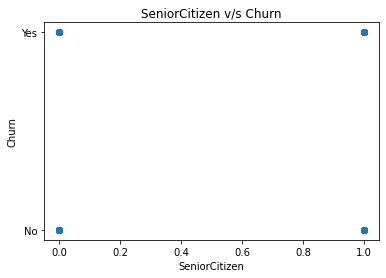

In [15]:
#plotting the scatter plot for objects to check the is there any relationship with label
plt.scatter(df.SeniorCitizen,df.Churn)
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.title('SeniorCitizen v/s Churn')
plt.show()

In [16]:
#Checking the values in the columns
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [17]:
#Dropping the unwanted columns
df = df.drop(columns = ['customerID','gender'])

In [18]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#LabelEncoder
le = LabelEncoder()

In [20]:
#Transforming the String or objects values into numerical data using LabelEncoder
df1 = le.fit_transform(df['Dependents'])
pd.Series(df1)
df['Dependents'] = df1
qq = le.fit_transform(df['Partner'])
pd.Series(qq)
df['Partner'] = qq
df2 = le.fit_transform(df['PhoneService'])
pd.Series(df2)
df['PhoneService'] = df2
df3 = le.fit_transform(df['MultipleLines'])
pd.Series(df3)
df['MultipleLines'] = df3
df4 = le.fit_transform(df['InternetService'])
pd.Series(df4)
df['InternetService'] = df4
df5 = le.fit_transform(df['OnlineSecurity'])
pd.Series(df5)
df['OnlineSecurity'] = df5
df6 = le.fit_transform(df['OnlineBackup'])
pd.Series(df6)
df['OnlineBackup'] = df6
df7 = le.fit_transform(df['DeviceProtection'])
pd.Series(df7)
df['DeviceProtection'] = df7
df8 = le.fit_transform(df['TechSupport'])
pd.Series(df8)
df['TechSupport'] = df8
df9 = le.fit_transform(df['StreamingTV'])
pd.Series(df9)
df['StreamingTV'] = df
df10 = le.fit_transform(df['StreamingMovies'])
pd.Series(df10)
df['StreamingMovies'] = df10
df11 = le.fit_transform(df['Contract'])
pd.Series(df11)
df['Contract'] = df11
df12 = le.fit_transform(df['PaperlessBilling'])
pd.Series(df12)
df['PaperlessBilling'] = df12
df13 = le.fit_transform(df['PaymentMethod'])
pd.Series(df13)
df['PaymentMethod'] = df13
er = le.fit_transform(df['TotalCharges'])
pd.Series(er)
df['TotalCharges'] = er
df14 = le.fit_transform(df['Churn'])
pd.Series(df14)
df['Churn']= df14

In [21]:
#Inserting the empty value with NAN value
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.NaN)

In [22]:
# Transforming the NAN value in the TotalCharges column with mean valu
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [23]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [24]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


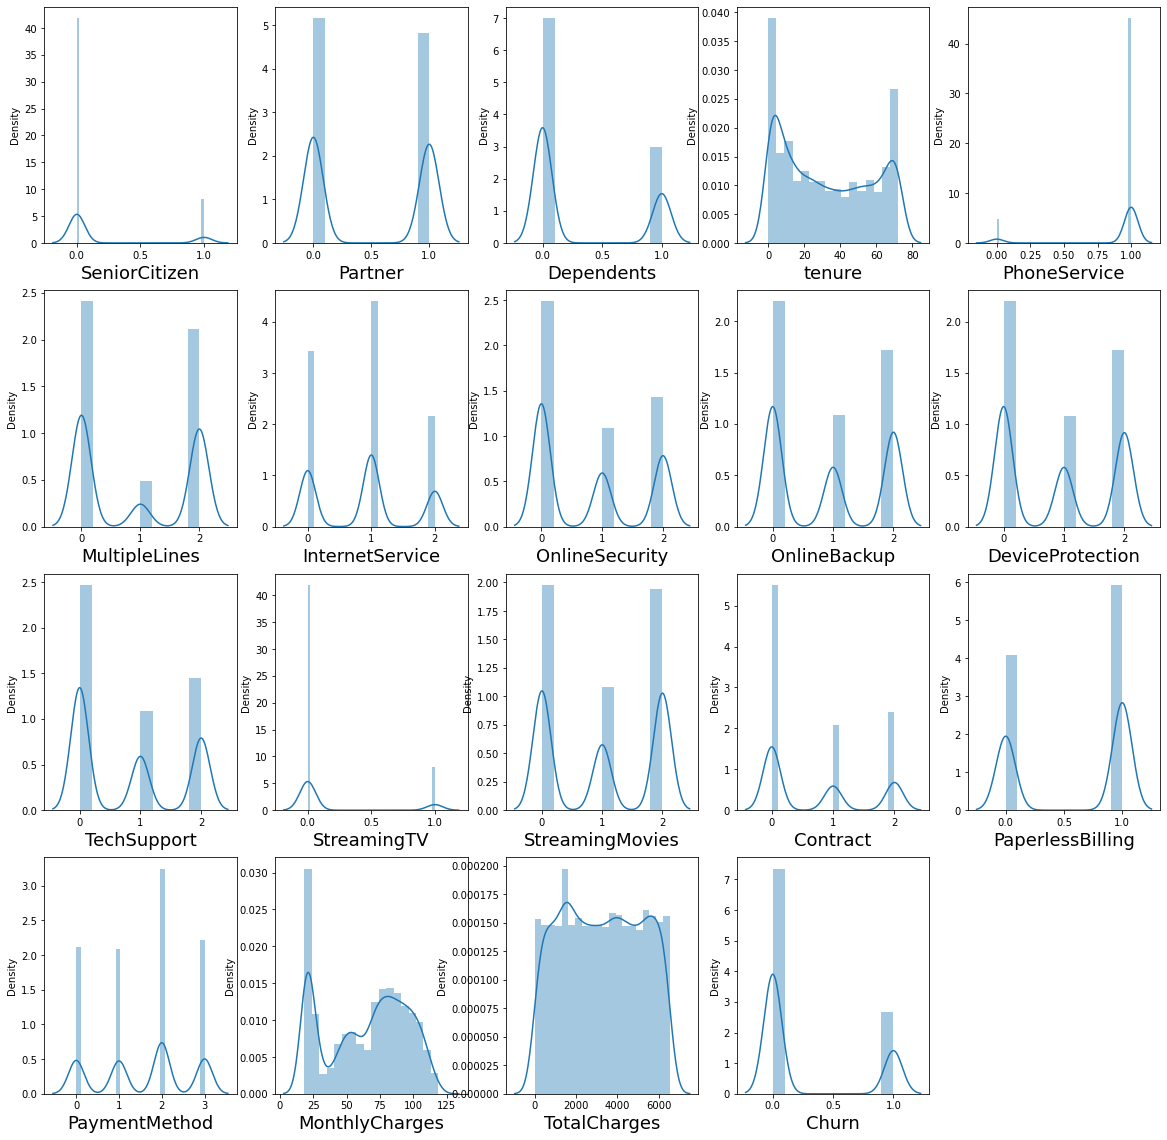

In [25]:
## plotting scatterplot to check the data distribution in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=19:
        sx = plt.subplot(4,5,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

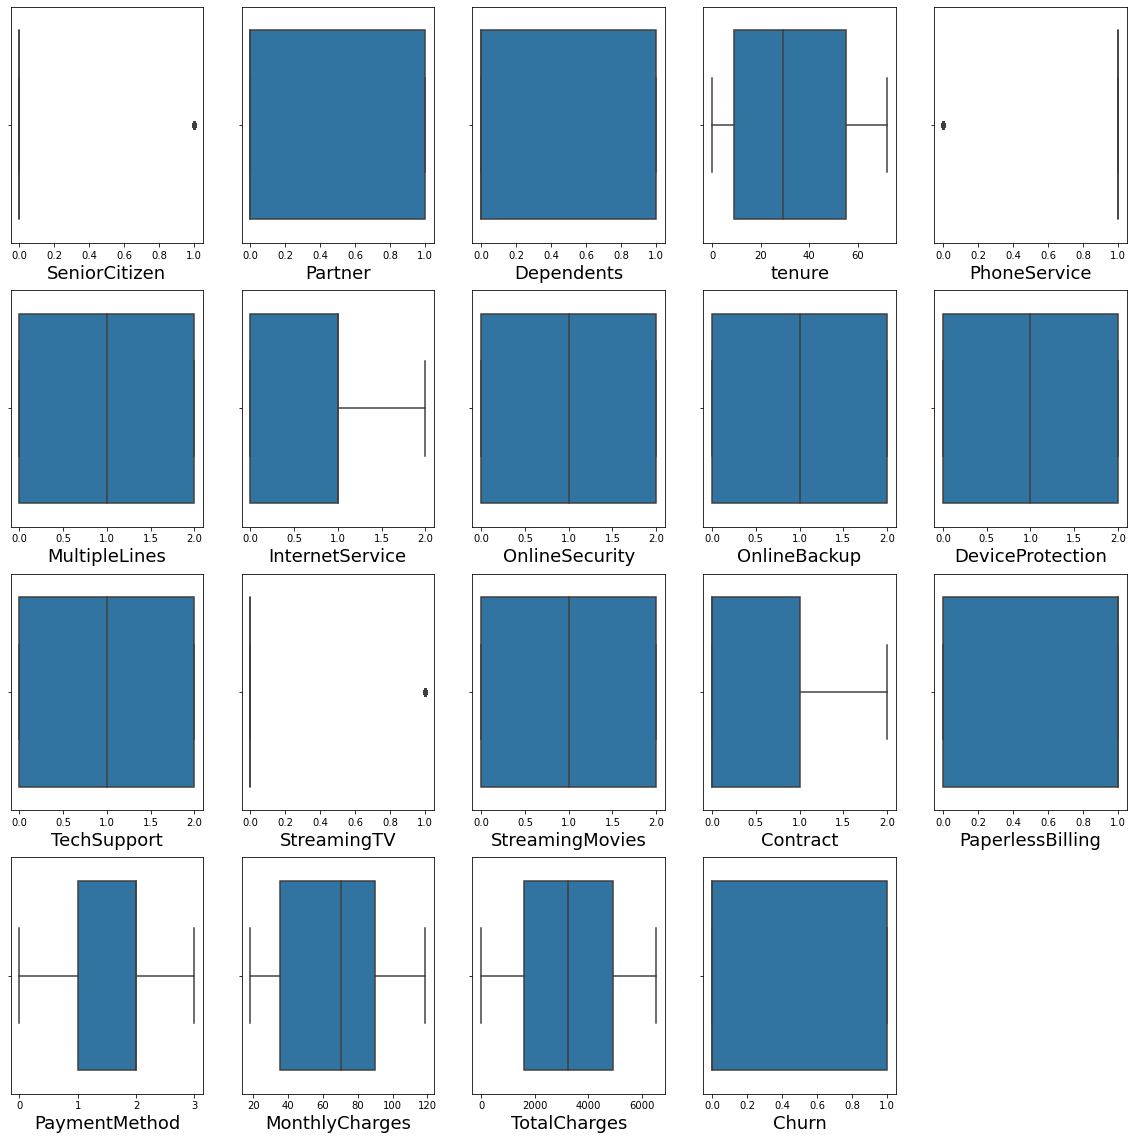

In [26]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=19:
        sx = plt.subplot(4,5,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [27]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [28]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [29]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

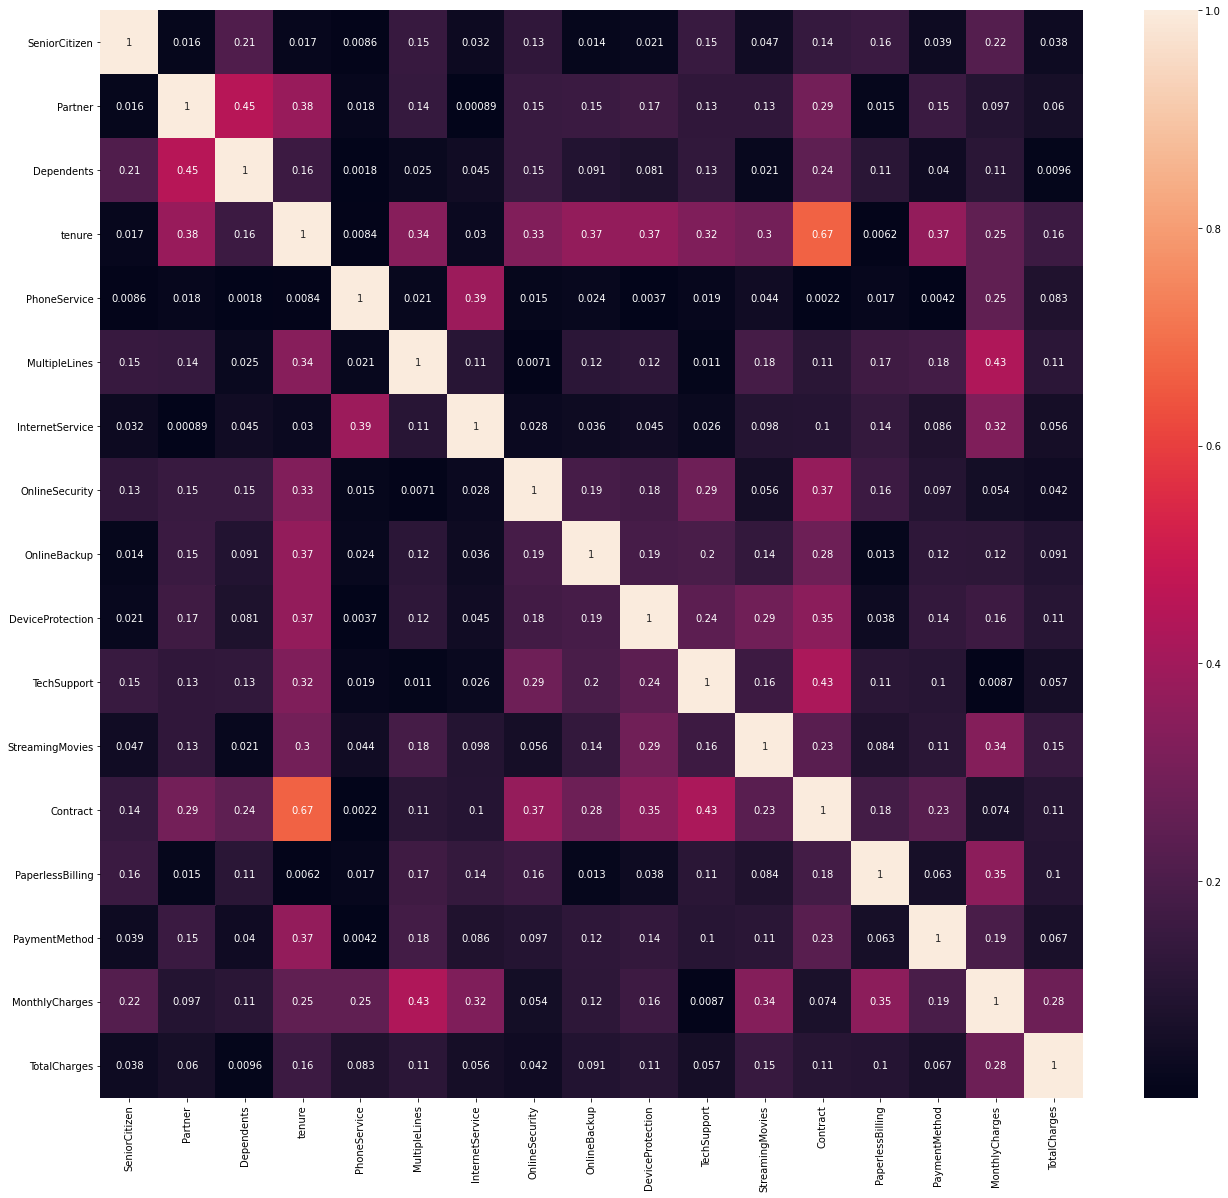

In [30]:
#Checking the co_relation between each columns 
x_corr = x.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':10})
plt.show()

In [31]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=15)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(15,'Score'))

        feature_Name        Score
13          Contract  1315.088872
3             tenure   997.268010
7     OnlineSecurity   643.162019
10       TechSupport   610.610024
8       OnlineBackup   279.877370
16    MonthlyCharges   273.463704
14  PaperlessBilling   268.985218
9   DeviceProtection   230.744618
2         Dependents   195.149314
0      SeniorCitizen   164.041424
11       StreamingTV   164.041424
1            Partner   163.060036
15     PaymentMethod    81.641664
6    InternetService    15.782320
12   StreamingMovies    10.447463


In [32]:
#Selecting the Best_feature columns 
x_new = [['Contract','tenure','OnlineSecurity','TechSupport','OnlineBackup','MonthlyCharges','PaperlessBilling','DeviceProtection'
         ,'Dependents','SeniorCitizen','StreamingTV','Partner','PaymentMethod','InternetService','StreamingMovies']]

In [33]:
#Assigning the x_new to x
x_new = x

In [34]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [35]:
#splitting the dataset into train and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [36]:
# Using KNeighborsClasssifer Algorithm for classification problem
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
#predicting the data using KNeighborsClasssifer
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1114,  165],
       [ 254,  228]], dtype=int64)

In [40]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1279
           1       0.58      0.47      0.52       482

    accuracy                           0.76      1761
   macro avg       0.70      0.67      0.68      1761
weighted avg       0.75      0.76      0.75      1761



In [41]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([0.75940383, 0.77146913, 0.74875798, 0.75852273, 0.74573864])

In [42]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.7567784615136459

In [43]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [3,5,7,9,11],'n_neighbors' : [3,5,7,9,11]}

In [44]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [45]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 7 , n_neighbors = 23)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=7, n_neighbors=23)

In [47]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [48]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[1130,  149],
       [ 230,  252]], dtype=int64)

In [49]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1279
           1       0.63      0.52      0.57       482

    accuracy                           0.78      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.78      0.78      1761



In [50]:
# Applying DecisonTreeClassifier Algorithm for classification problem
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
# Applying the Algorithm into training data
dtc.score(x_train,y_train)

0.9975388110564181

In [52]:
# predicting the values
y_pred = dtc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [53]:
#Accuracy score of DecisionTreeClassifier
accuracy_score(y_test,y_pred)

0.750709823963657

In [54]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1069,  210],
       [ 229,  253]], dtype=int64)

In [55]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1279
           1       0.55      0.52      0.54       482

    accuracy                           0.75      1761
   macro avg       0.69      0.68      0.68      1761
weighted avg       0.75      0.75      0.75      1761



In [56]:
#Cross validation score 
cross_val_score(dtc,x_sc,y,cv = 5)

array([0.73456352, 0.73456352, 0.72604684, 0.71732955, 0.73508523])

In [57]:
cross_val_score(DecisionTreeClassifier(),x_sc,y,cv =5).mean()

0.7290919978708303

In [58]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
grid_param = {'criterion':['gini','entropy'],'max_depth' : range(2,6),'min_samples_leaf':range(1,6),'min_samples_split':range(1,7)}

In [59]:
grid_search = GridSearchCV(estimator = dtc,param_grid = grid_param,cv = 5)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7)})

In [61]:
#checking the best Parameter
best_param = grid_search.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [62]:
#Applying the best parameters into DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf = 2,min_samples_split = 2)

In [63]:
#Applying the best parameters into training data
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [64]:
#predicting the values with new Parameters
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [65]:
accuracy_score(y_test,y_pred)

0.7898921067575241

In [ ]:
## We use two algorith for the classification problem

#KNNClassifier and DecisionTree Classifier

#Both Algorithm got the same Accuracy 78%